In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
from catboost import CatBoostClassifier

In [5]:
DF=pd.read_csv("data_interview_test.csv",delimiter=":")

In [6]:
DF["Matched"]=np.where(DF.matched_transaction_id==DF.feature_transaction_id,0,1)

In [7]:
DF["feature_transaction_id"]=DF["feature_transaction_id"].str.replace(',', '').astype("int64")

In [8]:
DF["receipt_id"]=DF["receipt_id"].str.replace(',', '').astype("int64")


In [9]:
DF["matched_transaction_id"]=DF["matched_transaction_id"].str.replace(',', '').astype("int64")

In [10]:
DF.dtypes

receipt_id                   int64
company_id                   int64
matched_transaction_id       int64
feature_transaction_id       int64
DateMappingMatch           float64
AmountMappingMatch         float64
DescriptionMatch           float64
DifferentPredictedTime     float64
TimeMappingMatch           float64
PredictedNameMatch         float64
ShortNameMatch             float64
DifferentPredictedDate     float64
PredictedAmountMatch       float64
PredictedTimeCloseMatch    float64
Matched                      int64
dtype: object

In [13]:
X=DF.iloc[:,0:-1]
y=DF.iloc[:,-1]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [15]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [17]:
# Affirming class imbalance

In [16]:
DF.Matched.value_counts()

1    11177
0      857
Name: Matched, dtype: int64

In [72]:
DF[DF.Matched==0]

,receipt_id,company_id,matched_transaction_id,feature_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch,Matched
25,10001,10000,10605,10605,0.90,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
27,10002,10000,10286,10286,0.95,0.0,0.0,1.0,0.0,0.8,0.0,0.0,0.0,0.0,0
38,10003,10000,10412,10412,0.85,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
73,10005,10000,10474,10474,0.90,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
105,10007,10000,10360,10360,0.85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11975,50221,50000,50034,50034,0.85,0.0,0.0,1.0,0.0,0.6,0.0,0.0,0.0,1.0,0
11980,50222,50000,50244,50244,0.95,0.0,0.6,1.0,0.0,0.6,0.0,0.0,0.0,0.0,0
11993,50223,50000,50342,50342,0.95,0.4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
12006,50224,50000,50050,50050,0.95,0.0,0.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [18]:
# Defining two models 
# - One for imbalanced dataset
# - Another for SMOTE balanced dataset

In [19]:
#SMOTE BALANCED DATASET
Model=CatBoostClassifier(iterations=60)

In [21]:
# Imbalanced dataset
Model_Unbalanced=CatBoostClassifier(iterations=60)

In [22]:
Model_Unbalanced.fit(X_train,y_train,eval_set=(X_test,y_test))

Learning rate set to 0.180428
0:	learn: 0.5555299	test: 0.5546384	best: 0.5546384 (0)	total: 49.7ms	remaining: 2.93s
1:	learn: 0.4593003	test: 0.4585700	best: 0.4585700 (1)	total: 52.3ms	remaining: 1.52s
2:	learn: 0.3892043	test: 0.3883482	best: 0.3883482 (2)	total: 53.9ms	remaining: 1.02s
3:	learn: 0.3336301	test: 0.3326242	best: 0.3326242 (3)	total: 56.5ms	remaining: 791ms
4:	learn: 0.2905518	test: 0.2893331	best: 0.2893331 (4)	total: 59ms	remaining: 649ms
5:	learn: 0.2598598	test: 0.2585173	best: 0.2585173 (5)	total: 61.1ms	remaining: 550ms
6:	learn: 0.2308582	test: 0.2293861	best: 0.2293861 (6)	total: 63.7ms	remaining: 483ms
7:	learn: 0.2080696	test: 0.2065218	best: 0.2065218 (7)	total: 66.2ms	remaining: 430ms
8:	learn: 0.1898142	test: 0.1880958	best: 0.1880958 (8)	total: 68.8ms	remaining: 390ms
9:	learn: 0.1743711	test: 0.1724707	best: 0.1724707 (9)	total: 71.5ms	remaining: 358ms
10:	learn: 0.1616165	test: 0.1596062	best: 0.1596062 (10)	total: 74.1ms	remaining: 330ms
11:	learn: 0.

In [23]:
Model.fit(X_train_res,y_train_res,eval_set=(X_test,y_test))

Learning rate set to 0.210264
0:	learn: 0.5540464	test: 0.5551345	best: 0.5551345 (0)	total: 8.33ms	remaining: 492ms
1:	learn: 0.4571091	test: 0.4601194	best: 0.4601194 (1)	total: 14.8ms	remaining: 429ms
2:	learn: 0.3868017	test: 0.3916478	best: 0.3916478 (2)	total: 21.6ms	remaining: 411ms
3:	learn: 0.3366204	test: 0.3434771	best: 0.3434771 (3)	total: 28.2ms	remaining: 395ms
4:	learn: 0.2975903	test: 0.3079286	best: 0.3079286 (4)	total: 34.9ms	remaining: 384ms
5:	learn: 0.2655505	test: 0.2790429	best: 0.2790429 (5)	total: 46ms	remaining: 414ms
6:	learn: 0.2429691	test: 0.2593749	best: 0.2593749 (6)	total: 52.1ms	remaining: 395ms
7:	learn: 0.2254232	test: 0.2446833	best: 0.2446833 (7)	total: 58.4ms	remaining: 380ms
8:	learn: 0.2088473	test: 0.2291709	best: 0.2291709 (8)	total: 64.7ms	remaining: 366ms
9:	learn: 0.1941290	test: 0.2139957	best: 0.2139957 (9)	total: 70.8ms	remaining: 354ms
10:	learn: 0.1842377	test: 0.2045556	best: 0.2045556 (10)	total: 77ms	remaining: 343ms
11:	learn: 0.17

In [24]:
Predictions_Prob=Model.predict_proba(X_test)

In [25]:
Predictions=Model.predict(X_test)

In [26]:
Prediction_Probability=[x[0] for x in Predictions_Prob]

In [27]:
Final_TEST=X_test.copy()

In [28]:
Final_TEST["Prediction_Probability"]=Prediction_Probability

In [29]:
Final_TEST.head(5)

,receipt_id,company_id,matched_transaction_id,feature_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch,Prediction_Probability
11838,50195,50000,50128,50024,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.001212
10476,40241,40000,40380,40380,0.95,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.916839
6208,30121,30000,31320,31321,0.95,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.283537
2613,20025,20000,20196,20016,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.001030
7475,30221,30000,30842,30831,0.00,0.0,0.0,1.0,0.0,0.8,0.0,1.0,0.0,0.0,0.004572


In [30]:
Predictions_Unbalanced=Model_Unbalanced.predict(X_test)

In [31]:
# F1 score and confusion matrix to evaluate the model performance

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
cf_matrix=confusion_matrix(Predictions, y_test)  

In [34]:
cf_matrix

array([[ 209,  147],
       [  76, 3540]])

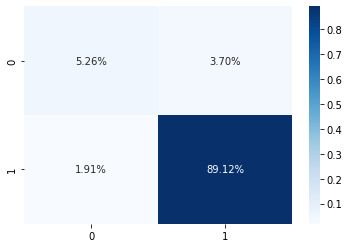

In [35]:
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [44]:
from sklearn.metrics import precision_recall_fscore_support as score



precision, recall, fscore, support = score(y_test, Predictions)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.58707865 0.9789823 ]
recall: [0.73333333 0.96013019]
fscore: [0.65210608 0.9694646 ]
support: [ 285 3687]


In [38]:
# Evaluation for data imbalance model

In [39]:
cf_matrix=confusion_matrix(Predictions_Unbalanced, y_test)

In [40]:
cf_matrix

array([[ 172,   31],
       [ 113, 3656]])

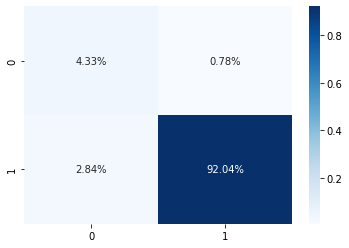

In [41]:
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [43]:

precision, recall, fscore, support = score(y_test, Predictions_Unbalanced)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.84729064 0.97001857]
recall: [0.60350877 0.99159208]
fscore: [0.70491803 0.9806867 ]
support: [ 285 3687]


In [ ]:
# We define a function which can attach itself to a model and then make predictions on a dataframe passed to it
# This function would then sort the dataset on "matched transaction id" and then return probabilities of it being a correct match

In [45]:
# Here we attach a model which would be used at the user-defined function below
MODEL= Model_Unbalanced

In [48]:
def Predict_Probability(data):
  Predictions_new=MODEL.predict_proba(data)
  Prediction_Probability=[x[0] for x in Predictions_new]
  data["Prediction_Probabilities"]=Prediction_Probability
  data=data.sort_values(by=['matched_transaction_id','Prediction_Probabilities'], ascending=[True,False])

  #print(Predictions_new)
  return data

In [51]:
Simulated_data=X_test.iloc[10:15,:]

In [52]:
Final_dataframe=Predict_Probability(Simulated_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [53]:
Final_dataframe

,receipt_id,company_id,matched_transaction_id,feature_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch,Prediction_Probabilities
2128,10196,10000,10462,10462,0.95,0.0,0.8,1.0,0.0,0.4,0.0,0.0,0.0,1.0,0.848149
218,10016,10000,10583,10008,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.001469
4030,20159,20000,20206,20001,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.001358
8687,30310,30000,30406,30402,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.001693
9008,30340,30000,31277,31270,0.00,0.4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.004064
